# Classification models

#### Created by: Ristanti Ramadanti

A template i created to help my (future) self building classification model not from scratch.
Classification algorithms are supervised learning technique to predict classes. 
Examples of implementations are for fraud detection, churn prediction, purchasing decision prediction, etc.

### Machine learning algorithm:
Binary classification model with the following algorithms:
    - Logistic Regression
    - Decision Trees
    - Random Forest
    - K-Nearest neighbor
    - Gaussian Naive Bayes

### Data analytics process include:

   - Preprocessing of data: merging, cleaning, transforming (scaling), feature engineering, variable selection
   - Exploratory data analysis
   - Splitting training and test set
   - Handling imbalanced data (small percentage of minority class) by using stratify splitting & oversampling technique for training set
   - Training and validating predictive models using model performance metrics:
       - Accuracy, precision, recall, F1 score
       - Confusion matrix
       - ROC Curve

## 1st step: Preprocessing & EDA

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import math as m
from scipy import stats

# Importing Viz library
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "“backend" on line 1 in
/Users/rfdanti/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
directory = "/Users/folder/"
df = pd.read_csv(directory+"data.csv")

In [6]:
# Checking distribution of numerical variables: plotting histograms
# Make histogram plot
def plot_hist(data, title, colour='#55DDE0'):
    plt.hist(data, color=colour, edgecolor='white', label=title)
    plt.title('Distribution')
    plt.ylabel('Frequency', fontweight='bold')
    plt.xlabel(title, fontweight='bold')
    plt.show()

# Make scatter plot
def plot_scatter(data, xvar, yvar, x_label, y_label, title):
    plt.scatter(x=data[xvar], y=data[yvar], marker='.', s=30, alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
# Boxplot
import seaborn as sns
plt.figure(figsize=(8,8))
sns.boxplot(x=df["var1"], y=df["var2"], palette="Paired").set_title('Distribution of var 2 by category var 1')

In [8]:
# To check correlation of categorical var
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
cramers_v(df["var1"], df["var2"])

0.05015912282857453

## Preprocessing
Data cleaning, scaling, feature engineering and pivoting data to prepare for merchant & buyer clustering analysis

In [ ]:
# Scaling variables to avoid biased model when analysing from variables with different scales
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(1, 10))
df[['var1','var2']] = scaler.fit_transform(df[['var1','var2']])

In [360]:
#Feature Engineering: transform several columns with missing value into binary variables
def missing_into_binary(df, old, new):
    df.rename(columns={old:new}, inplace=True)
    df[new] = df[new].fillna(0)
    df[new].values[dfp[new] > 0] = 1

# Creating binary variable 
missing_into_binary(df, 'var1', 'is_var1')

In [ ]:
# Converting variables into the right data type
category = ['var1', 'var2']

for column in category:
    df[column] = df[column].astype('int')
    df[column] = df[column].astype('category')

print(df.dtypes) 

In [166]:
# Pearson's Correlation test & its p-value between 2 variable
from scipy.stats import pearsonr
sm1 = df["var1"]
sm2 = df["var3"]
stat, p = pearsonr(sm1, sm2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.983, p=0.000
Probably dependent


Because p-value is < 0.05 and even almost 0, we can reject the null hypothesis that there's no correlation.
Thus we can remove var3 from our analysis because of its dependency with var1

In [433]:
# Splitting dataset into training-test data and ensure equal class representation using stratify
df_X = df.drop(["var3", "var1"], axis=1)
df_y = df[["var1"]]
Y = df[["var1"]]

"""Splitting train-test set randomly"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify=Y, test_size = 0.2, random_state = 42)

'Splitting train-test set randomly'

In [ ]:
# manual oversampling
X= X_train
def oversample(X, y, ran_state=42):
        """Performing oversampling (only to train data) because of class imbalance (optional)"""
        from sklearn.utils import resample
        # concatenate our training data back together

        # separate minority and majority classes
        negative = X[X[y]==0]
        positive = X[X[y]==1]

        # upsample minority
        positive_upsampled = resample(positive, replace=True, # sample with replacement
                                  n_samples=len(negative), # match number in majority class
                                  random_state=42) # reproducible results

        # combine majority and upsampled minority
        upsampled = pd.concat([negative, positive_upsampled])
        
        # check new class counts
        print(upsampled[y].value_counts())
        return upsampled

upsampled = oversample(X, "var1")
y_train = upsampled["var1"]
X_train = upsampled.drop(["var1"], axis = 1)

## 2nd Step: Classification Model (Supervised Learning)
The process:
- Exploring dependant variable & preparing independent variables
- Creating a class for classification which includes: 
    - Scaling, Encoding Categorical (optional)
    - Train:Test split
    - Handling imbalance data: oversampling
    - Fitting classification models:
        - Logistic Regression model
        - Decision Tree model
        - Random Forest model
        - K-nearest neigbor
        - Naive Bayes model
    - Comparing performance and evaluation metrics of models:
        - Confusion Matrix
        - ROC Curve
        - Accuracy, Recall, Precision, F1 Score

In [258]:
"""To display all outputs of each cell"""
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

"""To get a timing of each function"""
from time import time
def timing(f):
    def wrapper(*args, **kwargs):
        start = time()
        result = f(*args, **kwargs)
        end = time()
        print('function:%r took: %2.2f sec' % (f.__name__, end - start))
        return result
    return wrapper

'To display all outputs of each cell'

'To get a timing of each function'

### Creating Class for Classification

In [325]:
# Importing libraries
import pandas as pd
import numpy as np
import math as m
from scipy import stats

# Importing Viz library
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Creating a class for classification model
class classification():
    """Base processor"""""
    def __init__(self, directory, df_): #directory = path to the folder containing df        
        self.df = df_
        
    @timing
    def read(self):
        """Read raw data (optional)"""
        self.df = pd.read_csv(self.input_directory + self.df)
        print(self.df.head())
    
    @timing
    def dependent(self, y):
        """Splitting dependent and independent variables"""
        self.y = y
        self.df_y = self.df[self.y]
        self.df_X = self.df.drop([self.y], axis = 1)
            
    @timing
    def get_dummy(self, column_cat):
        """Encoding categorical data (optional)"""
        self.df_X = pd.get_dummies(self.df_X , columns=column_cat, drop_first=True) 
       
    @timing
    def split_random(self, size=0.2, seed=42):
        """Splitting train-test set randomly"""
        from sklearn.model_selection import train_test_split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.df_X, self.df_y, test_size = size, random_state = seed)
    
    @timing
    def add_train_test(self, X_train, X_test, y_train, y_test, y):
        """Adding pre-processed train and test set"""
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y = y
    
    @timing
    def oversampling(self, ran_state=33):
        """Performing oversampling (only to train data) because of class imbalance (optional)"""
        from sklearn.utils import resample
        # concatenate our training data back together
        X = pd.concat([self.X_train, self.y_train], axis=1)

        # separate minority and majority classes
        negative = X[X[self.y]==0]
        positive = X[X[self.y]==1]

        # upsample minority
        positive_upsampled = resample(positive, replace=True, # sample with replacement
                                  n_samples=len(negative), # match number in majority class
                                  random_state=42) # reproducible results

        # combine majority and upsampled minority
        upsampled = pd.concat([negative, positive_upsampled])

        self.y_train = upsampled[self.y]
        self.X_train = upsampled.drop([self.y], axis = 1)
        
        # check new class counts
        print(upsampled[self.y].value_counts())
        print(pd.Series(self.y_train).value_counts().plot.bar())

    @timing
    def standard_scaling(self):
        """Feature Scaling (optional)"""
        sc = StandardScaler()
        self.X_train = sc.fit_transform(self.X_train)
        self.X_test = sc.transform(self.X_test)
        
   
    @timing
    def logistic(self, threshold=0.5):
        """Logistic Reg"""
        self.LR = LogisticRegression(random_state=0)
        self.LR.fit(self.X_train, self.y_train)
        
        # Give class probabilities
        self.y_prob_LR = self.LR.predict_proba(self.X_test)[:,1]   
        # Give class predictions
        self.y_pred_LR = np.where(self.y_prob_LR > threshold, 1, 0) 
        print(self.LR.score(self.X_test, self.y_pred_LR))
               
        
    @timing
    def decision_tree(self, threshold=0.5):
        """Decision Tree"""
        self.DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        self.DT.fit(self.X_train, self.y_train)
        
        # Give class probabilities
        self.y_prob_DT = self.DT.predict_proba(self.X_test)[:,1]   
        # Give class predictions
        self.y_pred_DT = np.where(self.y_prob_DT > threshold, 1, 0) 
        print (self.DT.score(self.X_test, self.y_pred_DT))

    @timing
    def random_forest(self, threshold=0.5, estimators=10):
        """Random Forest"""
        self.RF = RandomForestClassifier(n_estimators = estimators, criterion = 'entropy', random_state = 0)
        self.RF.fit(self.X_train, self.y_train)
        
        # Give class probabilities
        self.y_prob_RF = self.RF.predict_proba(self.X_test)[:,1]   
        # Give class predictions
        self.y_pred_RF = np.where(self.y_prob_RF > threshold, 1, 0) 
        self.RF.score(self.X_test, self.y_pred_RF)

    @timing
    def knn(self, threshold=0.5, neighbor=5):
        """KNN"""
        self.KNN = KNeighborsClassifier(n_neighbors = neighbor, metric = 'minkowski', p = 2)
        self.KNN.fit(self.X_train, self.y_train)
        
        # Give class probabilities
        self.y_prob_KNN = self.KNN.predict_proba(self.X_test)[:,1]   
        # Give class predictions
        self.y_pred_KNN = np.where(self.y_prob_KNN > threshold, 1, 0) 
        self.DT.score(self.X_test, self.y_pred_KNN)
        
    @timing
    def bayes(self, threshold=0.5):
        """Naive Bayes"""
        self.NB = GaussianNB()
        self.NB.fit(self.X_train, self.y_train)   
        
        # Give class probabilities
        self.y_prob_NB = self.NB.predict_proba(self.X_test)[:,1]   
        # Give class predictions
        self.y_pred_NB = np.where(self.y_prob_NB > threshold, 1, 0) 
        self.NB.score(self.X_test, self.y_pred_NB)
    
    @timing
    def plot_cm_roc(self, model, threshold=0.5):
        """Plotting Confusion Matrix & ROC Curve"""
        # Option = {1:LogisticRegression, 2:DecisionTree, 3:RandomForest, 4:KNN, 5:NaiveBayes}
        if model == 1:
            self.y_probs = self.y_prob_LR
            print("Performance of Logistic Regression Model")
        elif model == 2:
            self.y_probs = self.y_prob_DT
            print("Performance of Decision Trees Model")
        elif model == 3:
            self.y_probs = self.y_prob_RF
            print("Performance of Random Forest Model")
        elif model == 4:
            self.y_probs = self.y_prob_KNN
            print("Performance of K-Nearest Neighbor Model")
        elif model == 5:
            self.y_probs = self.y_prob_NB
            print("Performance of Naive Bayes Model")
        else:
            return
                    
        # Making the Confusion Matrix
        self.y_pred = np.where(self.y_probs > threshold, 1, 0) 
        cm = confusion_matrix(self.y_test, self.y_pred)
        print(cm)
        
        print("Accuracy:",metrics.accuracy_score(self.y_test, self.y_pred))
        print("Precision:",metrics.precision_score(self.y_test, self.y_pred))
        print("Recall:",metrics.recall_score(self.y_test, self.y_pred))
        print("F1 Score:",metrics.f1_score(self.y_test, self.y_pred))

        # Visualising CM
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)

        # create heatmap
        sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') #Blues_r
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        
        #Receiver Operating Characteristic(ROC) curve
        fpr, tpr, threshold = metrics.roc_curve(self.y_test, self.y_probs)
        roc_auc = metrics.auc(fpr, tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xticks(np.arange(0.0, 1.1, step=0.1))
        plt.yticks(np.arange(0.0, 1.1, step=0.1))
        plt.xlim([-0.1, 1.1])
        plt.ylim([-0.1, 1.1])
        plt.ylabel('True Positive Rate or Sensitivity')
        plt.xlabel('False Positive Rate or (1-Specificity)')
        plt.show()
    
    
    @timing
    def save_pred(self, df_X_input, threshold=0.5, model=1):
        """Saving the prediction to new dataset"""
        # Option = {1:LogisticRegression, 2:DecisionTree, 3:RandomForest, 4:KNN, 5:NaiveBayes}
        if model == 1:
            self.y_prob_in = self.LR.predict_proba(df_X_input)
        elif model == 2:
            self.y_prob_in = self.DT.predict_proba(df_X_input)
        elif model == 3:
            self.y_prob_in = self.RF.predict_proba(df_X_input)
        elif model == 4:
            self.y_prob_in = self.KNN.predict_proba(df_X_input)
        elif model == 5:
            self.y_prob_in = self.NB.predict_proba(df_X_input)
        else:
            return
            
        self.df_output = df_X_input    
        self.df_output["Probability"] = self.y_prob_in
        self.df_output["Prediction"] = np.where(self.y_prob_in > threshold, 1, 0)
        return self.df_output
        
    
    @timing
    def compare_models(self, threshold=0.5):
        """Comparing all models"""
        # Instantiate the classfiers and make a list
        classifiers = [LogisticRegression(random_state=0), 
                       DecisionTreeClassifier(random_state=0),
                       RandomForestClassifier(random_state=0),
                       KNeighborsClassifier(),
                       GaussianNB()]

        # Define a result table as a DataFrame
        result_table = pd.DataFrame(columns=['classifiers', 'accuracy', 'precision','recall','f1',
                                             'fpr','tpr','auc'])

        # Train the models and record the results
        for cls in classifiers:
            model = cls.fit(self.X_train, self.y_train)
            self.yproba = model.predict_proba(self.X_test)[::,1]

            fpr, tpr, _ = roc_curve(self.y_test,  self.yproba)
            auc = roc_auc_score(self.y_test, self.yproba)
            
            self.y_pred = np.where(self.yproba > threshold, 1, 0) 
            acc = metrics.accuracy_score(self.y_test, self.y_pred)
            prec = metrics.precision_score(self.y_test, self.y_pred)
            rec = metrics.recall_score(self.y_test, self.y_pred)
            f1 = metrics.f1_score(self.y_test, self.y_pred)
            
            result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                                'accuracy':acc, 'precision':prec,'recall':rec,'f1':f1,
                                                'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)
            
        print(result_table)
        # Set name of the classifiers as index labels
        result_table.set_index('classifiers', inplace=True)
        
        fig = plt.figure(figsize=(8,6))

        for i in result_table.index:
            plt.plot(result_table.loc[i]['fpr'], 
                     result_table.loc[i]['tpr'], 
                     label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

        plt.plot([0,1], [0,1], color='orange', linestyle='--')

        plt.xticks(np.arange(0.0, 1.1, step=0.1))
        plt.xlabel("False Positive Rate", fontsize=15)

        plt.yticks(np.arange(0.0, 1.1, step=0.1))
        plt.ylabel("True Positive Rate", fontsize=15)

        plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
        plt.legend(prop={'size':13}, loc='lower right')

        plt.show()

        print(result_table)

In [208]:
classifier = classification("", data)
classifier.dependent("var1")
classifier.split_random(0.2)
classifier.oversampling()

function:'dependent' took: 0.12 sec
function:'split_random' took: 1.51 sec


In [210]:
classifier.standard_scaling()

function:'standard_scaling' took: 20.17 sec


In [195]:
classifier.logistic()

1.0
function:'logistic' took: 11.72 sec


Performance of Logistic Regression Model
[[367165 304097]
 [ 14410  27825]]
Accuracy: 0.5535972821189157
Precision: 0.08382993594880725
Recall: 0.6588137800402509
F1 Score: 0.14873435482965708


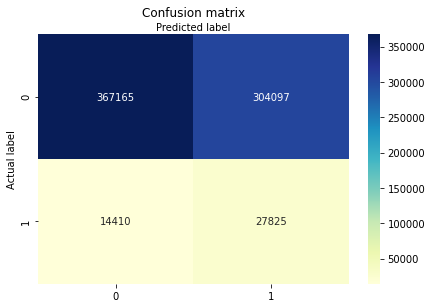

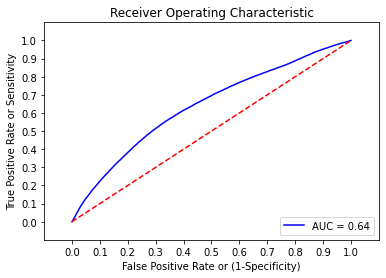

function:'plot_cm_roc' took: 5.09 sec


In [196]:
classifier.plot_cm_roc(1)

In [198]:
classifier.decision_tree()

1.0
function:'decision_tree' took: 148.38 sec


Performance of Decision Trees Model
[[625899  45363]
 [ 34797   7438]]
Accuracy: 0.887651945277976
Precision: 0.1408685441563607
Recall: 0.17610986148928615
F1 Score: 0.15653015699313944


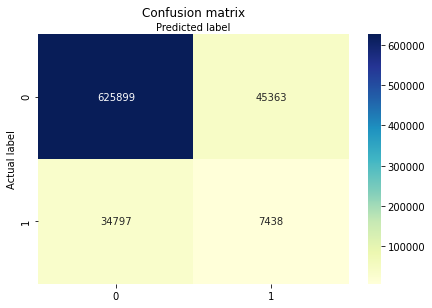

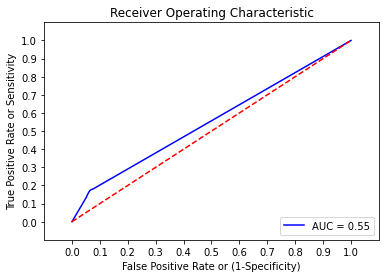

function:'plot_cm_roc' took: 3.21 sec


In [199]:
classifier.plot_cm_roc(2)

In [200]:
classifier.random_forest()

function:'random_forest' took: 332.29 sec


Performance of Random Forest Model
[[650136  21126]
 [ 36892   5343]]
Accuracy: 0.9186850119902397
Precision: 0.20185877819335826
Recall: 0.12650645199479105
F1 Score: 0.1555367955286446


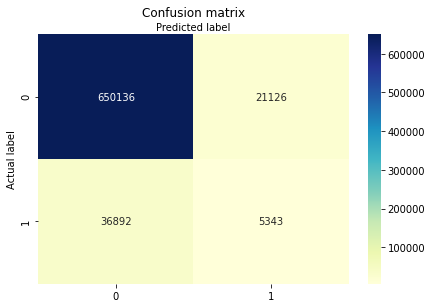

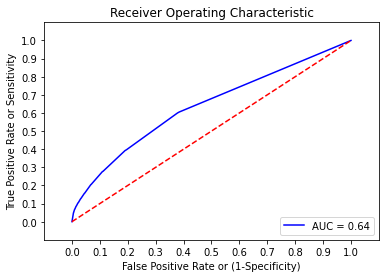

function:'plot_cm_roc' took: 3.05 sec


In [201]:
classifier.plot_cm_roc(3)

              classifiers  accuracy  precision    recall        f1  \
0      LogisticRegression  0.873217   0.305345  0.882210  0.453669   
1  DecisionTreeClassifier  0.942062   0.513249  0.561632  0.536351   
2  RandomForestClassifier  0.953225   0.609793  0.600054  0.604884   
3    KNeighborsClassifier  0.918519   0.398748  0.719832  0.513207   
4              GaussianNB  0.906541   0.361121  0.736295  0.484578   

                                                 fpr  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4174645811037...   
1  [0.0, 0.025714224965803667, 0.0257156424303847...   
2  [0.0, 0.0025783680730277754, 0.002578368073027...   
3  [0.0, 0.02894462674613918, 0.05100888041560061...   
4  [0.0, 0.0001941926476112178, 0.000201279970516...   

                                                 tpr       auc  
0  [0.0, 6.701514542286557e-05, 0.000111691909038...  0.942994  
1  [0.0, 0.528414421659295, 0.5286824822409865, 0...  0.765808  
2  [0.0, 0.2118795514452933, 0.2119242282089085

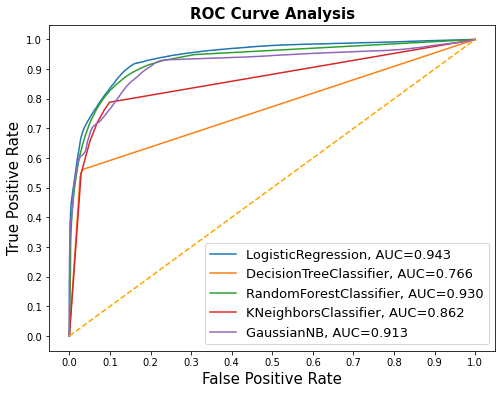

                        accuracy  precision    recall        f1  \
classifiers                                                       
LogisticRegression      0.873217   0.305345  0.882210  0.453669   
DecisionTreeClassifier  0.942062   0.513249  0.561632  0.536351   
RandomForestClassifier  0.953225   0.609793  0.600054  0.604884   
KNeighborsClassifier    0.918519   0.398748  0.719832  0.513207   
GaussianNB              0.906541   0.361121  0.736295  0.484578   

                                                                      fpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4174645811037...   
DecisionTreeClassifier  [0.0, 0.025714224965803667, 0.0257156424303847...   
RandomForestClassifier  [0.0, 0.0025783680730277754, 0.002578368073027...   
KNeighborsClassifier    [0.0, 0.02894462674613918, 0.05100888041560061...   
GaussianNB              [0.0, 0.0001941926476112178, 0.0002012799705

In [162]:
classifier.compare_models()

              classifiers  accuracy  precision    recall        f1  \
0      LogisticRegression  0.872153   0.156512  0.320063  0.210224   
1  DecisionTreeClassifier  0.919031   0.210732  0.190523  0.200118   
2  RandomForestClassifier  0.929614   0.268554  0.187962  0.221145   
3    KNeighborsClassifier  0.892549   0.172939  0.269988  0.210831   
4              GaussianNB  0.833876   0.147542  0.444740  0.221576   

                                                 fpr  \
0  [0.0, 0.0, 0.0, 0.0, 1.4374177078362265e-06, 1...   
1  [0.0, 0.035267043461761814, 0.0352670434617618...   
2  [0.0, 0.0027152820501026315, 0.002715282050102...   
3  [0.0, 0.03637241767908787, 0.05667163054915106...   
4  [0.0, 0.00048153493212513585, 0.00075464429661...   

                                                 tpr       auc  
0  [0.0, 2.5600983077750185e-05, 7.68029492332505...  0.688470  
1  [0.0, 0.17352346330099075, 0.17367706919945725...  0.575324  
2  [0.0, 0.026676224367015694, 0.02670182535009

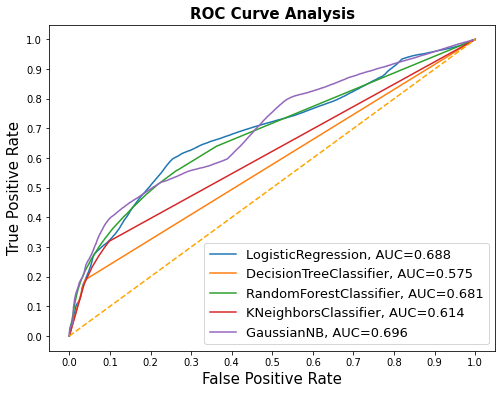

                        accuracy  precision    recall        f1  \
classifiers                                                       
LogisticRegression      0.872153   0.156512  0.320063  0.210224   
DecisionTreeClassifier  0.919031   0.210732  0.190523  0.200118   
RandomForestClassifier  0.929614   0.268554  0.187962  0.221145   
KNeighborsClassifier    0.892549   0.172939  0.269988  0.210831   
GaussianNB              0.833876   0.147542  0.444740  0.221576   

                                                                      fpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.0, 0.0, 0.0, 1.4374177078362265e-06, 1...   
DecisionTreeClassifier  [0.0, 0.035267043461761814, 0.0352670434617618...   
RandomForestClassifier  [0.0, 0.0027152820501026315, 0.002715282050102...   
KNeighborsClassifier    [0.0, 0.03637241767908787, 0.05667163054915106...   
GaussianNB              [0.0, 0.00048153493212513585, 0.000754644296

In [463]:
classifier.compare_models()